#MACHINE LEARNING COURSEWORK

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Exploratory Data Analysis Libraries
import pandas as pd
import numpy as np
import math

In [ ]:
# Data Visualisation libraries
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Interactive plot libraries
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
#Loading Training data and Test data into Dataframes
df_train =pd.read_csv("/content/drive/MyDrive/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3203 non-null   int64  
 1   Tank Failure Pressure (bar)      3203 non-null   float64
 2   Liquid Ratio (%)                 3203 non-null   float64
 3   Tank Width (m)                   3203 non-null   float64
 4   Tank Length (m)                  3203 non-null   float64
 5   Tank Height (m)                  3203 non-null   float64
 6   BLEVE Height (m)                 3203 non-null   float64
 7   Vapour Height (m)                3203 non-null   float64
 8   Vapour Temperature (K)           3203 non-null   float64
 9   Liquid Temperature (K)           3203 non-null   float64
 10  Obstacle Distance to BLEVE (m)   3203 non-null   int64  
 11  Obstacle Width (m)               3203 non-null   int64  
 12  Obstacle Height (m) 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10045 non-null  float64
 1   Tank Failure Pressure (bar)      10043 non-null  float64
 2   Liquid Ratio (%)                 10041 non-null  float64
 3   Tank Width (m)                   10041 non-null  float64
 4   Tank Length (m)                  10041 non-null  float64
 5   Tank Height (m)                  10042 non-null  float64
 6   BLEVE Height (m)                 10040 non-null  float64
 7   Vapour Height (m)                10041 non-null  float64
 8   Vapour Temperature (K)           10022 non-null  float64
 9   Liquid Temperature (K)           10023 non-null  float64
 10  Obstacle Distance to BLEVE (m)   10042 non-null  float64
 11  Obstacle Width (m)               10044 non-null  float64
 12  Obstacle Height (m

In [ ]:
df_train.shape

(10050, 25)

In [ ]:
df_train["Status"].value_counts()

Status
Subcooled      6285
Superheated    3683
Subcool          23
subcooled        20
Subcoled         14
Superheat         8
superheated       6
Saperheated       4
Name: count, dtype: int64

In [ ]:
df_c = df_train[df_train["Target Pressure (bar)"] < 0]
df_c["Target Pressure (bar)"]

Series([], Name: Target Pressure (bar), dtype: float64)

In [ ]:
df_train["Status"] = df["Status"].str.lower()
df["Status"] = df["Status"].replace(['subcool', 'subcoled'], 'subcooled')
df["Status"] = df["Status"].replace(['superheat', 'saperheated'], 'superheated')


NameError: name 'df' is not defined

In [ ]:
df["Status"].nunique()

2

In [ ]:
# Convert 'Status' column to binary values (1 for superheated, 0 for supercooled)
df["Status"] = (df["Status"] != "supercooled").astype(int)

<Axes: >

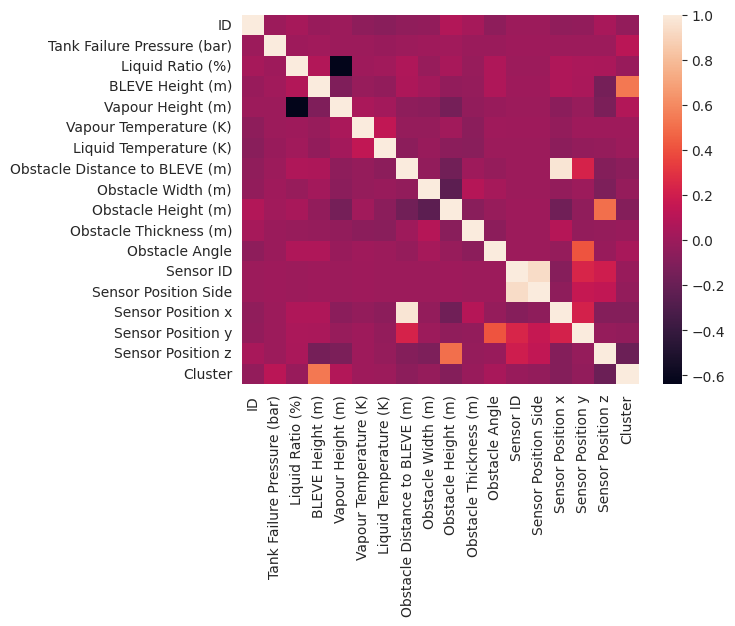

In [ ]:
sns.heatmap(df.drop(columns=["Target Pressure (bar)", "Status", 'Liquid Critical Pressure (bar)', 'Liquid Critical Temperature (K)', 'Liquid Boiling Temperature (K)', 'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)']).corr())

In [ ]:
# Checks for the datatype for each feature
print(f'{df_train.shape} The first figures by the left represent the numbers of datapoints while the second figure represents the numbers of features')
print('\n')
print(df_train.info()) #The info() method/function prints information about the DataFrame.
#The information contains the number of columns, column labels, column data types(int,float,string/object) memory usage,
#range index, and the number of cells in each column (non-null values)

(10050, 25) The first figures by the left represent the numbers of datapoints while the second figure represents the numbers of features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10045 non-null  float64
 1   Tank Failure Pressure (bar)      10043 non-null  float64
 2   Liquid Ratio (%)                 10041 non-null  float64
 3   Tank Width (m)                   10041 non-null  float64
 4   Tank Length (m)                  10041 non-null  float64
 5   Tank Height (m)                  10042 non-null  float64
 6   BLEVE Height (m)                 10040 non-null  float64
 7   Vapour Height (m)                10041 non-null  float64
 8   Vapour Temperature (K)           10022 non-null  float64
 9   Liquid Temperature (K)           10023 non-null  float64
 10  Obs

<Axes: >

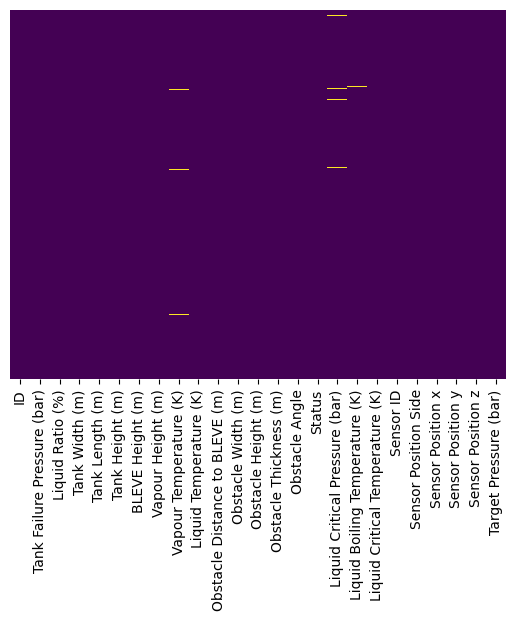

In [ ]:
sns.heatmap(data = df_train.isnull(),yticklabels=False,cmap = "viridis", cbar = False)# check for missing datapoints using heatmap function

In [ ]:
correlations = df_train.select_dtypes('number').drop(columns="Target Pressure (bar)").corr()
correlations

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
ID,1.000000,-0.001820,0.036746,-0.025398,-0.032712,0.072045,-0.016855,-0.001992,-0.056787,-0.072574,...,0.034338,-0.051896,0.042698,-0.044007,-0.042583,0.000572,0.000837,-0.048307,-0.042224,0.044329
Tank Failure Pressure (bar),-0.001820,1.000000,0.004925,-0.008360,-0.009489,0.008243,0.014730,-0.004275,-0.003012,-0.015516,...,-0.007164,-0.007683,-0.000975,0.000860,0.000973,0.004141,0.006835,-0.005223,-0.005038,-0.000902
Liquid Ratio (%),0.036746,0.004925,1.000000,0.022278,0.205378,0.099394,0.081826,-0.638602,0.000439,0.016656,...,-0.018672,0.066159,0.026168,-0.025409,-0.025144,-0.002198,-0.002205,0.071988,0.057932,0.050984
Tank Width (m),-0.025398,-0.008360,0.022278,1.000000,-0.100841,-0.058788,0.012053,-0.054934,-0.013490,0.020530,...,0.015090,0.063194,0.001629,-0.002363,-0.001209,0.002523,0.002423,0.156483,0.036667,0.011221
Tank Length (m),-0.032712,-0.009489,0.205378,-0.100841,1.000000,-0.095202,-0.041280,-0.202523,-0.061445,0.003399,...,-0.001585,-0.095067,0.021468,-0.021170,-0.021339,-0.000746,-0.000705,0.037612,-0.027884,-0.030712
Tank Height (m),0.072045,0.008243,0.099394,-0.058788,-0.095202,1.000000,-0.055049,0.618088,0.064139,-0.032707,...,-0.021552,0.045627,-0.010961,0.011524,0.011982,-0.002509,-0.002489,0.000033,0.031918,-0.100881
BLEVE Height (m),-0.016855,0.014730,0.081826,0.012053,-0.041280,-0.055049,1.000000,-0.113938,-0.019803,-0.040783,...,-0.027297,0.064150,-0.083370,0.084111,0.083885,0.001973,0.002215,0.066997,0.043700,-0.148489
Vapour Height (m),-0.001992,-0.004275,-0.638602,-0.054934,-0.202523,0.618088,-0.113938,1.000000,0.048949,0.021988,...,-0.043910,-0.018694,-0.020398,0.019873,0.020126,-0.000553,-0.000623,-0.064416,-0.021613,-0.123540
Vapour Temperature (K),-0.056787,-0.003012,0.000439,-0.013490,-0.061445,0.064139,-0.019803,0.048949,1.000000,0.135883,...,-0.063102,0.010160,-0.354249,0.354453,0.353738,0.002841,0.003243,-0.032366,0.004267,0.007140
Liquid Temperature (K),-0.072574,-0.015516,0.016656,0.020530,0.003399,-0.032707,-0.040783,0.021988,0.135883,1.000000,...,-0.071763,-0.001221,-0.349224,0.348795,0.348837,-0.000439,-0.000297,-0.057272,-0.031621,-0.028045


<Axes: >

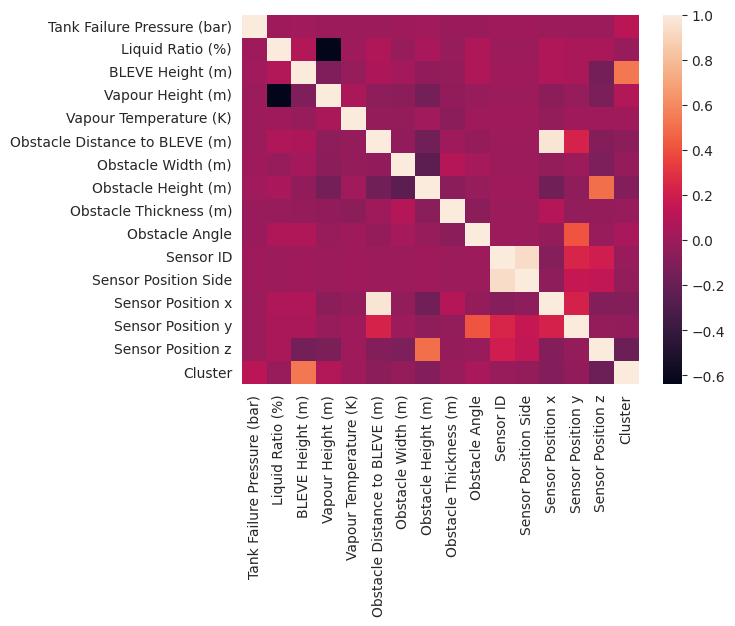

In [ ]:
sns.heatmap(df.drop(columns=['ID', 'Liquid Temperature (K)', 'Liquid Critical Temperature (K)', "Target Pressure (bar)", "Status", 'Liquid Critical Pressure (bar)', 'Liquid Critical Temperature (K)', 'Liquid Boiling Temperature (K)', 'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)']).corr())

In [ ]:
 sensor_corr_target = df_train["Target Pressure (bar)"].corr(df_train["Sensor Position z"])
 obstacle_ang_corr_target = df_train["Target Pressure (bar)"].corr(df_train["Obstacle Height (m)"])
 print(f"OBS: {abs(obstacle_ang_corr_target)}\nSensor : {abs(sensor_corr_target)}")

OBS: 0.11327910498566277
Sensor : 0.19523375991230105


[link text](https://)##   EXPLORATORY DATA ANALYSIS

In [ ]:
df_train.head(5)

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,7.32,0.42,2.42,5.39,1.00,1.79,0.60,524.61,354.49,...,Superheated,37.9,-1.0,152.0,18.0,2.0,12.15,7.90,10.7,0.199929
1,3204.0,7.18,0.42,2.39,5.39,1.01,1.81,0.59,522.80,354.31,...,Superheated,37.9,-1.0,152.0,19.0,3.0,12.50,-2.95,-1.9,0.435681
2,3205.0,7.32,0.41,2.39,5.38,1.00,1.78,0.62,523.00,354.59,...,Superheated,37.9,-1.0,152.0,20.0,3.0,12.50,-2.95,4.4,0.264031
3,3206.0,7.26,0.42,2.40,5.41,1.00,1.81,0.61,522.35,354.37,...,Superheated,37.9,-1.0,152.0,21.0,3.0,12.50,-2.95,10.7,0.270576
4,3207.0,7.32,0.42,2.40,5.41,1.02,1.79,0.62,522.98,354.33,...,Superheated,37.9,-1.0,152.0,22.0,4.0,12.50,-2.70,11.0,0.204675


In [ ]:
df.describe()

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Cluster
count,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,...,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000,9938.000000
mean,8208.699940,38.053169,0.504293,1.697288,5.597544,1.674832,1.023489,0.846147,396.693613,343.432768,...,40.101409,-20.621252,125.535238,14.012679,2.335983,12.907455,2.987482,3.078909,0.360653,0.686557
std,2887.356782,226.815926,0.228206,0.765072,2.596565,0.751315,0.575309,0.536492,71.827333,35.552257,...,2.298002,20.482188,27.625975,7.792586,1.334818,4.156818,4.710582,4.211543,0.496481,0.737488
min,3203.000000,4.920000,0.100000,0.380000,0.580000,0.380000,-0.020000,0.180000,281.210000,282.950000,...,37.900000,-42.000000,96.700000,1.000000,1.000000,5.150000,-9.050000,-2.800000,0.016098,0.000000
25%,5708.250000,13.722500,0.300000,1.010000,3.380000,1.010000,0.590000,0.400000,336.620000,312.780000,...,37.900000,-42.000000,96.700000,7.000000,1.000000,9.300000,-0.150000,-0.600000,0.102253,0.000000
50%,8218.500000,22.910000,0.510000,1.620000,5.620000,1.610000,1.010000,0.780000,386.690000,342.320000,...,37.900000,-1.000000,152.000000,14.000000,2.000000,12.725000,2.800000,2.300000,0.206182,1.000000
75%,10709.750000,32.170000,0.700000,2.390000,7.810000,2.390000,1.580000,1.200000,441.865000,365.310000,...,42.500000,-1.000000,152.000000,21.000000,3.000000,16.150000,6.400000,5.300000,0.412276,1.000000
max,13202.000000,4995.616406,0.900000,3.020000,10.020000,3.020000,2.020000,2.620000,573.300000,424.600000,...,42.500000,-1.000000,152.000000,27.000000,5.000000,23.750000,19.550000,16.700000,9.170477,3.000000


<Axes: >

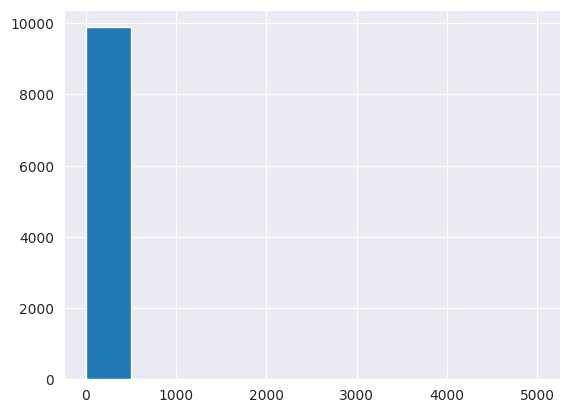

In [ ]:
df["Tank Failure Pressure (bar)"].hist()

In [ ]:
liquid_mask = df_train[df_train.Status=="Supercooled"]
liquid_mask["Target Pressure (bar)"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Target Pressure (bar), dtype: float64

<Axes: xlabel='Vapour Height (m)', ylabel='count'>

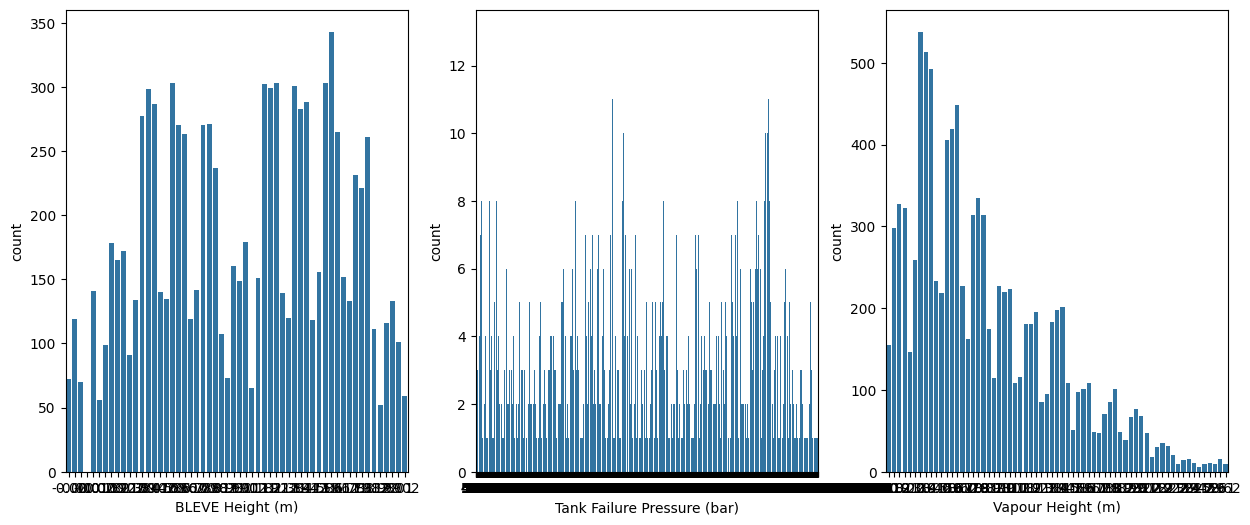

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data = df_train, x = "BLEVE Height (m)")
plt.subplot(1,3,2)
sns.countplot(data = df_train, x = "Tank Failure Pressure (bar)")
plt.subplot(1,3,3)
sns.countplot(data = df_train, x = "Vapour Height (m)")
#plt.savefig('C:/Users/Admin/Desktop/chart.png')
#plt.show()


<Figure size 1500x600 with 0 Axes>

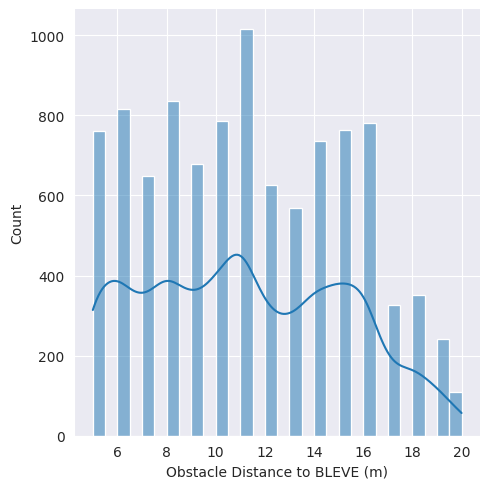

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.displot(df_train['Obstacle Distance to BLEVE (m)'],kde= True, bins =30)



### WRANGLING FUNCTION

In [ ]:

def wrangle2(filepath):
    """
    Args:
        filepath: Path to the CSV file.

    Returns:
        df: Processed DataFrame.
    """

    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)

    # Check for NaN values
    df.isna().any().sum()

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Drop some features that don't help
    df.drop(columns=['Sensor ID', 'Sensor Position Side'], inplace=True)

    # Create a new column named 'Tank Volume'
    df['Tank_Vol'] = df['Tank Width (m)'] * df['Tank Height (m)'] * df['Tank Length (m)']

    # Drop the columns Width, Height, Length
    df.drop(columns=['Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)'], inplace=True)

    # Correct spelling mistakes in the 'Status' column
    df["Status"] = df["Status"].str.lower()
    df["Status"] = df["Status"].replace(['subcool', 'subcoled'], 'subcooled')
    df["Status"] = df["Status"].replace(['superheat', 'saperheated'], 'superheated')

    # Drop negative values in `BLEVE Height (m)`
    df = df[df['BLEVE Height (m)'] >= 0]

    # Convert 'Status' column to binary values (1 for superheated, 0 for subcooled)
    df["Status"] = (df["Status"] != "subcooled").astype(int)

    # Drop columns with redundant info
    df.drop(columns=['Liquid Critical Pressure (bar)', 'Liquid Critical Temperature (K)', 'Liquid Boiling Temperature (K)'], inplace=True)

    # Drop columns with multicollinearity
    df.drop(columns=["Obstacle Height (m)", "Obstacle Angle"], inplace=True)

    #IQR
    Q1 = df.quantile(0.1)
    Q3 = df.quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df


In [ ]:
option1_encoded = wrangle2('/content/drive/MyDrive/train.csv')

# MACHINE LEARNING

In [ ]:
X = option1_encoded.drop('Target Pressure (bar)', axis = 1)
y = option1_encoded['Target Pressure (bar)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, train_size = .80)

REGRESSION IMPLEMENTATION

#### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtree = DecisionTreeRegressor()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dtree_pred =dtree.predict(X_test)
pd.DataFrame(dtree_pred).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1908 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, mean_absolute_percentage_error

In [ ]:
MSE = np.square(np.subtract(y_test,dtree_pred)).mean()
RMSE = math.sqrt(MSE)

In [ ]:
print(mean_absolute_percentage_error(y_test, dtree_pred))
print('\n')
print(mean_squared_error(y_test,dtree_pred))
print('\n')
print(mean_absolute_error(y_test,dtree_pred))
print('\n')
print(r2_score(y_test,dtree_pred))
print('\n')
print(RMSE)

0.4774850222783516


0.04383924943138933


0.10967078474895178


0.5558869573936964


0.20937824488563594


In [ ]:
dtree_pred_test = dtree.predict(wrangle2('/content/drive/MyDrive/test.csv'))

In [ ]:
pd.DataFrame(dtree_pred_test).to_csv('dtree_submission.csv', index=True)

#### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm_pred  = lm.predict(X_test)

In [ ]:
error_rate = []
error_rate.append(np.mean(lm_pred != y_test))

In [ ]:
error_rate

[1.0]

In [ ]:
cd=pd.DataFrame(dict(Actual = y_test, Predicted = lm_pred))
#pd.set_option('display.max_rows', 200) # displays the entire dataset
cd.head()

,Actual,Predicted
ID,,
7216.0,0.054250,0.354036
7625.0,0.831306,0.432602
11920.0,0.382970,0.275978
4850.0,0.211490,0.325781
9892.0,0.343515,0.544536


In [ ]:
lm.coef_

lm.intercept_

0.2938308909461844

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
MSE = np.square(np.subtract(y_test,lm_pred)).mean()
RMSE_LM = math.sqrt(MSE)

In [ ]:
print(f"MAPE: {mean_absolute_percentage_error(y_test, lm_pred)}")
print(f"MSE : {mean_squared_error(y_test,lm_pred)}")
print(f"MAE: {mean_absolute_error(y_test,lm_pred)}")
print(f"R2 Score: {r2_score(y_test,lm_pred)}")

MAPE: 0.9262353292941138
MSE : 0.050751624244655937
MAE: 0.15514999233356433
R2 Score: 0.4858612190479813


In [ ]:
lm_pred_test = lm.predict(wrangle2('/content/drive/MyDrive/test.csv'))

In [ ]:
pd.DataFrame(lm_pred_test).to_csv('lm_submission.csv', index=True)

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge()

In [ ]:
ridge_model.fit(X_train,y_train)

Ridge()

In [ ]:
rid_pred = ridge_model.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(y_test,rid_pred)).mean()
RMSE_RID= math.sqrt(MSE)

In [ ]:
print(f"MAPE: {mean_absolute_percentage_error(y_test, rid_pred)}")
print(f"MSE : {mean_squared_error(y_test,rid_pred)}")
print(f"MAE: {mean_absolute_error(y_test,rid_pred)}")
print(f"R2 Score: {r2_score(y_test,rid_pred)}")

MAPE: 0.926088433034143
MSE : 0.0507536222491482
MAE: 0.15514426613905477
R2 Score: 0.48584097828506434


In [ ]:
ridge_pred_test = ridge_model.predict(wrangle2('/content/drive/MyDrive/test.csv'))
pd.DataFrame(ridge_pred_test).to_csv('ridge_submission.csv', index = True)

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,y_train)

Lasso()

In [ ]:
lasso_pred = lasso_model.predict(X_test)

In [ ]:

MSE = np.square(np.subtract(y_test,lasso_pred)).mean()

RMSE_LASSO = math.sqrt(MSE)

In [ ]:
print(f"MAPE: {mean_absolute_percentage_error(y_test, lasso_pred)}")
print(f"MSE : {mean_squared_error(y_test,lasso_pred)}")
print(f"MAE: {mean_absolute_error(y_test,lasso_pred)}")
print(f"R2 Score: {r2_score(y_test,lasso_pred)}")

MAPE: 1.6253824107512873
MSE : 0.09824620944864251
MAE: 0.22442655497273828
R2 Score: 0.004717836899562622


In [ ]:
lasso_pred_test = lasso_model.predict(wrangle2('/content/drive/MyDrive/test.csv'))
pd.DataFrame(lasso_pred_test).to_csv('lasso_submission.csv', index = True)

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rfr_pred = rfr.predict(X_test)

In [ ]:
MSE = np.square(np.subtract(y_test,rfr_pred)).mean()
RMSE_RFR = math.sqrt(MSE)

In [ ]:
print(f"MAPE: {mean_absolute_percentage_error(y_test, rfr_pred)}")
print(f"MSE : {mean_squared_error(y_test,rfr_pred)}")
print(f"MAE: {mean_absolute_error(y_test,rfr_pred)}")
print(f"R2 Score: {r2_score(y_test,rfr_pred)}")

MAPE: 0.540378765198339
MSE : 0.024868409228703578
MAE: 0.10262902182201257
R2 Score: 0.7480708490544927


In [ ]:
randomf_pred_test = rfr.predict(wrangle2('/content/drive/MyDrive/test.csv'))
pd.DataFrame(randomf_pred_test).to_csv('rfr_submission.csv', index = 1)

#### Data Strutures(DataFrame)

In [ ]:
lasso=[mean_absolute_percentage_error(y_test, lasso_pred), mean_squared_error(y_test,lasso_pred),mean_absolute_error(y_test,lasso_pred),r2_score(y_test,lasso_pred),RMSE_LASSO]
ridge=[mean_absolute_percentage_error(y_test, rid_pred), mean_squared_error(y_test,rid_pred),mean_absolute_error(y_test,rid_pred),r2_score(y_test,rid_pred), RMSE_RID]
linear=[mean_absolute_percentage_error(y_test, lm_pred), mean_squared_error(y_test,lm_pred),mean_absolute_error(y_test,lm_pred),r2_score(y_test,lm_pred), RMSE_LM]
randomforest=[mean_absolute_percentage_error(y_test, rfr_pred), mean_squared_error(y_test,rfr_pred),mean_absolute_error(y_test,rfr_pred),r2_score(y_test,rfr_pred),RMSE_RFR]

In [ ]:
lasso=pd.DataFrame(lasso,columns  = ["LASSO REGRESSION"], index = ["MAPE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR", "R-SQUARED ERROR","ROOT MEAN SQUARED ERROR"])
ridge=pd.DataFrame(ridge, columns = ["RIDGE REGRESSION"], index = ["MAPE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR", "R-SQUARED ERROR","ROOT MEAN SQUARED ERROR"])
linear =pd.DataFrame(linear,columns  = ["LINEAR REGRESSION"], index   = ["MAPE","MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR", "R-SQUARED ERROR","ROOT MEAN SQUARED ERROR"])
randomforest =pd.DataFrame(randomforest,columns  = ["RANDOM FOREST REGRESSION"], index   = ["MAPE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR", "R-SQUARED ERROR","ROOT MEAN SQUARED ERROR"])

In [ ]:
concat_data = pd.concat([lasso,ridge,linear,randomforest], axis =1 )

In [ ]:
pd.DataFrame(concat_data, index  = ["MAPE", "MEAN SQUARED ERROR", "MEAN ABSOLUTE ERROR", "R-SQUARED ERROR","ROOT MEAN SQUARED ERROR"], columns  = ["LASSO REGRESSION","RIDGE REGRESSION", "LINEAR REGRESSION", "RANDOM FOREST REGRESSION"])

,LASSO REGRESSION,RIDGE REGRESSION,LINEAR REGRESSION,RANDOM FOREST REGRESSION
MAPE,1.625382,0.926088,0.926235,0.540379
MEAN SQUARED ERROR,0.098246,0.050754,0.050752,0.024868
MEAN ABSOLUTE ERROR,0.224427,0.155144,0.155150,0.102629
R-SQUARED ERROR,0.004718,0.485841,0.485861,0.748071
ROOT MEAN SQUARED ERROR,0.313443,0.225286,0.225281,0.157697


In [ ]:
concat_data.transpose()

,MAPE,MEAN SQUARED ERROR,MEAN ABSOLUTE ERROR,R-SQUARED ERROR,ROOT MEAN SQUARED ERROR
LASSO REGRESSION,1.625382,0.098246,0.224427,0.004718,0.313443
RIDGE REGRESSION,0.926088,0.050754,0.155144,0.485841,0.225286
LINEAR REGRESSION,0.926235,0.050752,0.155150,0.485861,0.225281
RANDOM FOREST REGRESSION,0.540379,0.024868,0.102629,0.748071,0.157697


### NEURAL NETWORK

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with one neuron for regression
])

In [ ]:
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=2)

# Evaluate the model
test_loss, test_mae = nn_model.evaluate(X_test_scaled, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)

Epoch 1/50
191/191 - 1s - loss: 0.0550 - mae: 0.1363 - val_loss: 0.0509 - val_mae: 0.1262 - 1s/epoch - 6ms/step
Epoch 2/50
191/191 - 0s - loss: 0.0443 - mae: 0.1134 - val_loss: 0.0491 - val_mae: 0.1105 - 427ms/epoch - 2ms/step
Epoch 3/50
191/191 - 1s - loss: 0.0418 - mae: 0.1082 - val_loss: 0.0478 - val_mae: 0.1221 - 578ms/epoch - 3ms/step
Epoch 4/50
191/191 - 1s - loss: 0.0403 - mae: 0.1074 - val_loss: 0.0447 - val_mae: 0.1171 - 566ms/epoch - 3ms/step
Epoch 5/50
191/191 - 1s - loss: 0.0386 - mae: 0.1050 - val_loss: 0.0447 - val_mae: 0.1031 - 595ms/epoch - 3ms/step
Epoch 6/50
191/191 - 0s - loss: 0.0373 - mae: 0.1030 - val_loss: 0.0445 - val_mae: 0.1070 - 488ms/epoch - 3ms/step
Epoch 7/50
191/191 - 1s - loss: 0.0364 - mae: 0.1024 - val_loss: 0.0411 - val_mae: 0.1123 - 584ms/epoch - 3ms/step
Epoch 8/50
191/191 - 1s - loss: 0.0347 - mae: 0.1008 - val_loss: 0.0390 - val_mae: 0.1106 - 562ms/epoch - 3ms/step
Epoch 9/50
191/191 - 0s - loss: 0.0330 - mae: 0.0974 - val_loss: 0.0380 - val_mae: 

In [ ]:
predictions = nn_model.predict(X_test_scaled)

60/60 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mape = mean_absolute_percentage_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the metrics
print("MAPE: ", mape)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


MAPE:  179977095351246.62
Mean Squared Error: 0.027093168623255313
Mean Absolute Error: 0.06379666362717783
R-squared: 0.4439525029941902


In [ ]:
nn_pred_test = nn_model.predict(scaler.transform(wrangle2('/content/drive/MyDrive/test.csv')))
pd.DataFrame(nn_pred_test).to_csv('nn_submission.csv', index = 1)

101/101 [==============================] - 0s 4ms/step


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
mape = mean_absolute_percentage_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

# Print the evaluation metrics
print("Random Forest Regression Metrics:")
print("MAPE: ", mape)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Random Forest Regression Metrics:
MAPE:  0.5359043016141007
Mean Squared Error: 0.024829199860761066
Mean Absolute Error: 0.10203001234770442
R-squared: 0.7484680591327099
